In [1]:
import os

network_path = os.path.join("networks", "FS_subthresh")

input_name = "CheckSubthresholdEntrainment"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")

input_config = f"{input_name}-input.json"
duration=3
osc_freq = 40

In [2]:
from snudda.init import SnuddaInit

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337,
                 snudda_data="../../../../BasalGangliaData/data/")
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=20, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neuron_density=0.013*80500)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing networks/FS_subthresh/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, verbose=False)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 86/252 (20 neurons)
Processing hyper voxel : 50/252 (20 neurons)
Processing hyper voxel : 85/252 (19 neurons)
Processing hyper voxel : 56/252 (18 neurons)
Processing hyper voxel : 49/252 (18 neurons)
Processing hyper voxel : 55/252 (17 neurons)
Processing hyper voxel : 91/252 (16 neurons)
Processing hyper voxel : 92/252 (16 neurons)
Processing hyper voxel : 87/252 (8 neurons)
Processing hyper voxel : 79/252 (7 neurons)
Processing hyper voxel : 128/252 (7 neurons)
Processing hyper voxel : 127/252 (7 neurons)
Processing hyper voxel : 43/252 (6 neurons)
Processing hyper voxel : 44/252 (6 neurons)
Processing hyper voxel : 90/252 (6 neurons)
Processing hyper voxel : 121/252 (6 neurons)
Processing hyper voxel : 93/252 (6 neurons)
Processing hyper voxel : 97/252 (6 neurons)
Processing hyper voxel : 122/252 (5 n

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 2285 out of total 2285 synapses
Read 217 out of total 217 gapJunctions


!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

In [6]:
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file="CheckSubthresholdEntrainment-input.json",
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Loading 20 neurons with 218 synapses and 51 gap junctions
Writing spikes to networks/FS_subthresh/input-spikes.hdf5


Loading 20 neurons with 218 synapses and 51 gap junctions


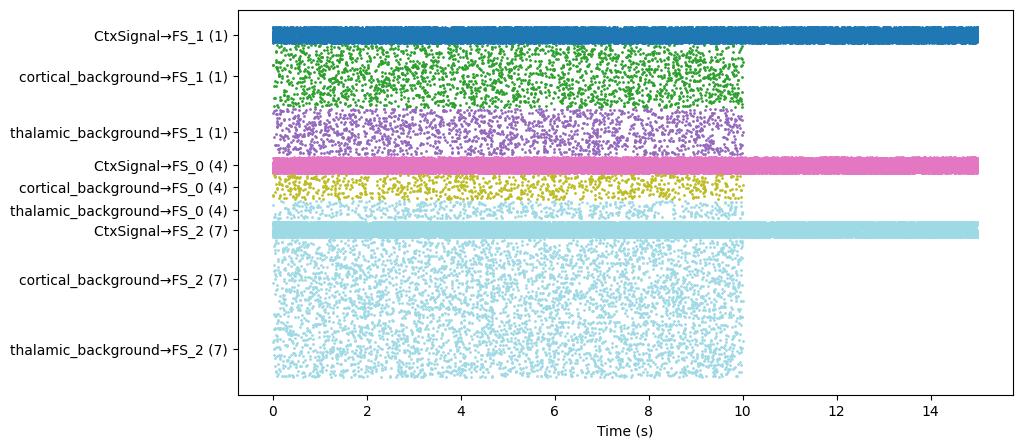

In [7]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)
spi.plot_input(neuron_type="FS", num_neurons=3)

In [8]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_gj}")

numprocs=3
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Worker waiting for master node to compile NEURON modules.
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Running on master node:  nrnivmodl /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Worker waiting for master node to compile NEURON modules.
/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mech

0

In [9]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_nogj} --disableGJ")

numprocs=3
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Worker waiting for master node to compile NEURON modules.
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Worker waiting for master node to compile NEURON modules.
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Running on master node:  nrnivmodl /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms
/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mech

0

In [10]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

Loading 20 neurons with 218 synapses and 51 gap junctions
Loading networks/FS_subthresh/simulation/output-GJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
1: (FS_1, pf9439e45, macdedfff)
4: (FS_0, p59a48310, m4cd420e2)
5: (FS_0, p59a48310, m86da4874)
14: (FS_0, pb1ef6b01, m15ae4048)
Loading networks/FS_subthresh/simulation/output-noGJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (FS_1, p6eb0c221, m48f576bb)
5: (FS_0, p59a48310, m86da4874)
14: (FS_0, pb1ef6b01, m15ae4048)


Loading network info from networks/FS_subthresh/network-synapses.hdf5
Loading 20 neurons with 218 synapses and 51 gap junctions
Loading input info from networks/FS_subthresh/input-spikes.hdf5
Loading networks/FS_subthresh/simulation/output-GJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
1: (FS_1, pf9439e45, macdedfff)
4: (FS_0, p59a48310, m4cd420e2)
5: (FS_0, p59a48310, m86da4874)
14: (FS_0, pb1ef6b01, m15ae4048)
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Plotted 20 traces (total 20)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/networks/FS_subthresh/figures/Network-voltage-trace--FS-traces.pdf


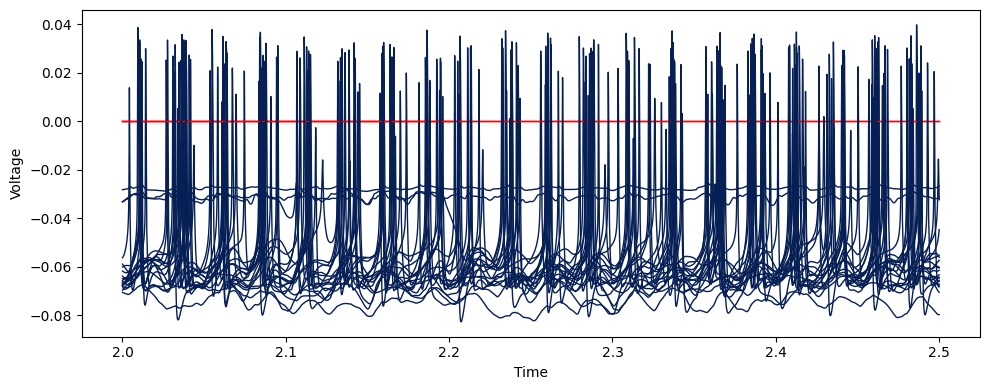

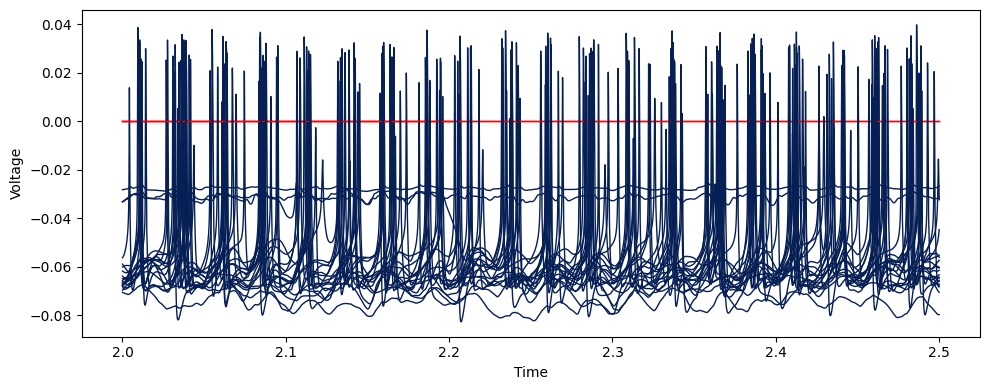

In [11]:
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file_gj)
pt.plot_traces(offset=0, time_range=(2,2.5),fig_size=(10,4))

Loading network info from networks/FS_subthresh/network-synapses.hdf5
Loading 20 neurons with 218 synapses and 51 gap junctions
Loading input info from networks/FS_subthresh/input-spikes.hdf5
Loading networks/FS_subthresh/simulation/output-noGJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (FS_1, p6eb0c221, m48f576bb)
5: (FS_0, p59a48310, m86da4874)
14: (FS_0, pb1ef6b01, m15ae4048)
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Plotted 20 traces (total 20)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/networks/FS_subthresh/figures/Network-voltage-trace--FS-traces.pdf


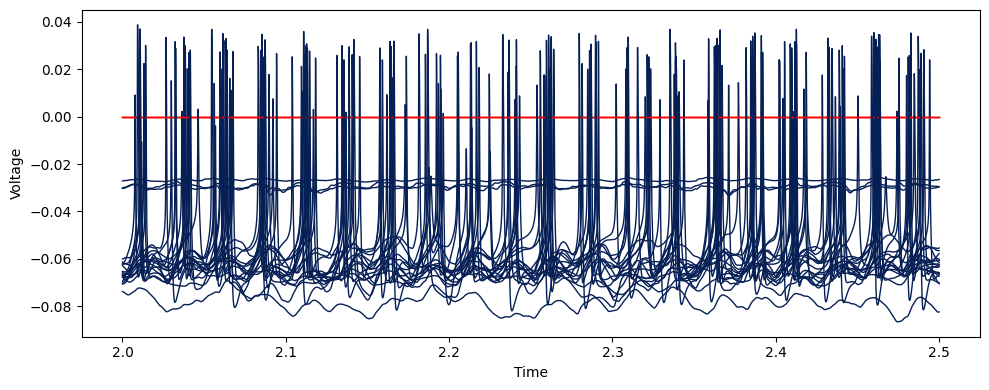

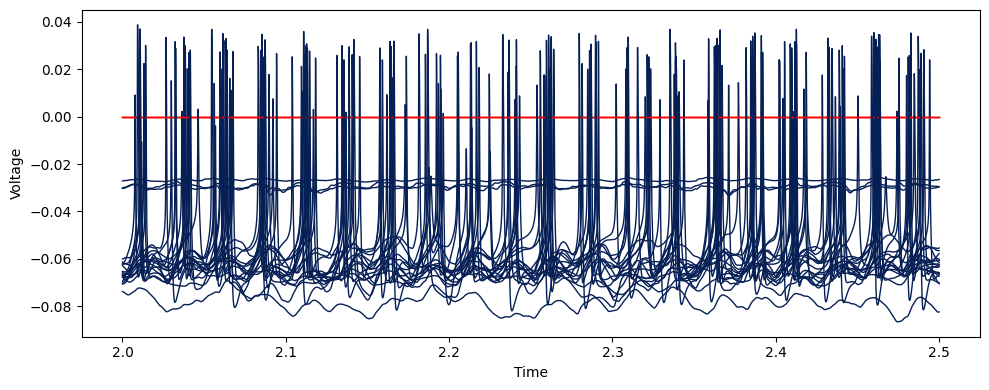

In [12]:
from snudda.plotting.plot_traces import PlotTraces
pt2 = PlotTraces(output_file=sim_file_nogj)
pt2.plot_traces(offset=0, time_range=(2,2.5),fig_size=(10,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Writing figure to networks/FS_subthresh/figures/spike-period-histogram.pdf


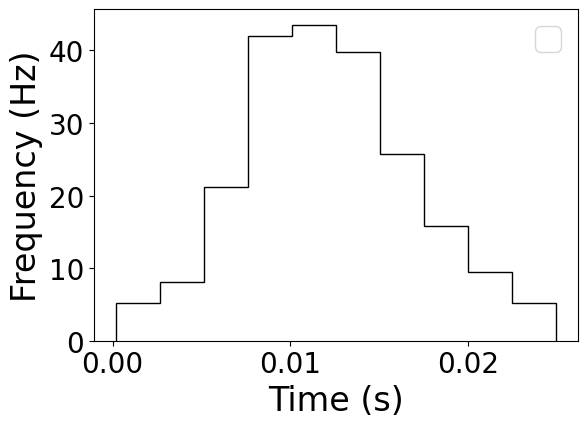

(array([ 5.20833333,  8.06451613, 21.16935483, 42.00268816, 43.51478494,
        39.81854838, 25.70564516, 15.79301075,  9.40860215,  5.20833333]),
 array([0.000175, 0.002655, 0.005135, 0.007615, 0.010095, 0.012575,
        0.015055, 0.017535, 0.020015, 0.022495, 0.024975]))

In [14]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_gj,
                             snudda_load=sl, snudda_simulation_load=sls_gj)
spr.plot_period_histogram_mod(neuron_id=None, period=1/osc_freq)

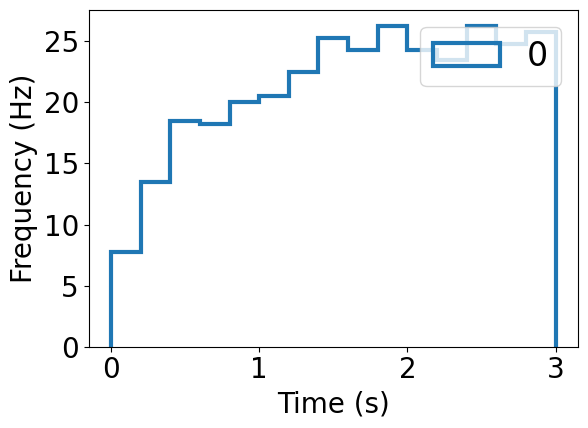

<AxesSubplot:xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [15]:
spr.plot_spike_histogram(bin_size=200e-3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Writing figure to networks/FS_subthresh/figures/spike-period-histogram.pdf


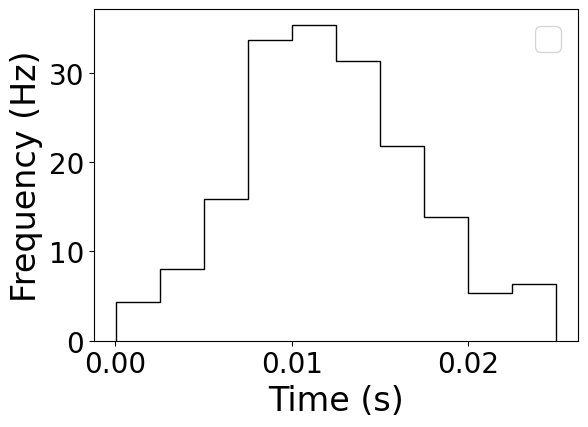

(array([ 4.34201737,  8.01603206, 15.86506346, 33.73413493, 35.40414161,
        31.39612558, 21.87708751, 13.86105544,  5.34402138,  6.34602538]),
 array([2.50000001e-05, 2.52000000e-03, 5.01500000e-03, 7.51000000e-03,
        1.00050000e-02, 1.25000000e-02, 1.49950000e-02, 1.74900000e-02,
        1.99850000e-02, 2.24800000e-02, 2.49750000e-02]))

In [18]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_nogj,
                             snudda_load=sl, snudda_simulation_load=sls_nogj)
spr2.plot_period_histogram_mod(neuron_id=None, period=1/osc_freq)

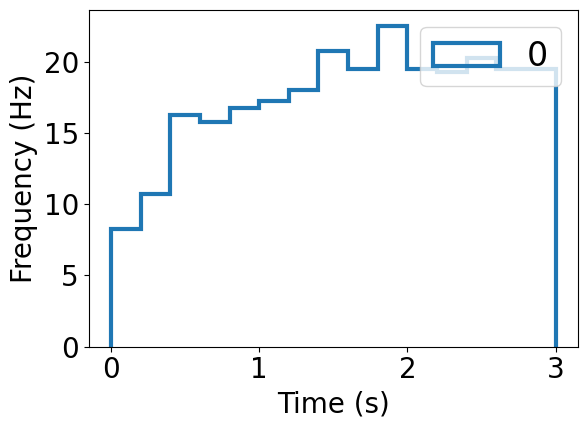

<AxesSubplot:xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [19]:
spr2.plot_spike_histogram(bin_size=200e-3)